# Низкочастотные фильтры

Автор: Винник Екатерина Петровна, 22.М04


## Идеальный фильтр, фильтр Баттерворта, фильтр Гаусса
### Theory

Фильтрация низких частот применяется для уменьшения резких переходов на изображениях с целью их размытия. Примерами таких фильтров являются идеальный фильтр, фильтр Баттерворта, фильтр Гаусса. Эти фильтры определяются следующим образом:

$$
\begin{equation}
    \begin{gathered}
        H(u, v) = 
        \begin{cases}
            1, \textrm{at } D(u, v) \leq D_0 \\
            0, \textrm{else};
        \end{cases} \\
        H(u, v) = \frac{1}{1 + (D(u, v) / D_0)^{2n}}; \\
        H(u, v) = \exp (-D^2(u, v) / 2 D_0);
    \end{gathered}
\end{equation}
$$
где $D_0$ — заданная положительная константа, а $D(u,v)$ — расстояние от точки $(u,v)$ частотной области до начала координат (центра частотного прямоугольника).

### Реализация

#### Быстрое преобразование Фурье

In [1]:
import numpy as np


def get_fft(img, shift=False):
    h = img.shape[0]
    w = img.shape[1]
    img = img.astype(complex)
    
    x_arr = np.arange(h)
    y_arr = np.arange(w)
    
    x_mat = np.repeat(x_arr.reshape((h, 1)), w, 1)
    y_mat = np.repeat(y_arr.reshape((1, w)), h, 0)
    
    if shift:
        exp_val = (x_mat + y_mat) * np.pi * 1j
        img = np.multiply(img, np.exp(exp_val))
        
    if len(img.shape) == 3:
        img = np.swapaxes(img, 0, 2)
        img_fft = np.fft.fft2(img)
    else:
        img_fft = np.fft.fft2(img)
        
    return img_fft

#### Обратное быстрое преобразование Фурье

In [2]:
import numpy as np


def get_ifft(img_fft, shift=False):
    h = img_fft.shape[0]
    w = img_fft.shape[1]
    img_fft = img_fft.astype(complex)
    
    u_arr = np.arange(h)
    v_arr = np.arange(w)
    
    u_mat = np.repeat(u_arr.reshape((h, 1)), w, 1)
    v_mat = np.repeat(v_arr.reshape((1, w)), h, 0)
     
    if shift:
        exp_val = (u_mat + v_mat) * np.pi * 1j
        img_fft = np.multiply(img_fft, np.exp(exp_val))
        
    if len(img_fft.shape) == 3:
        img_fft = np.swapaxes(img_fft, 0, 2)
        img_ifft = np.fft.ifft2(img_fft)
    else:
        img_ifft = np.fft.ifft2(img_fft)
        
    return img_ifft

#### Идеальный фильтр низких частот

In [3]:
import numpy as np


def apply_ideal_LP(img_fft, d0perc=.5):
    h = img_fft.shape[0]
    w = img_fft.shape[1]
    
    d0 = d0perc * np.min([h, w]) / 2
    
    u_arr = np.arange(h)
    v_arr = np.arange(w)
    
    u_mat = np.repeat(u_arr.reshape((h, 1)), w, 1)
    v_mat = np.repeat(v_arr.reshape((1, w)), h, 0)
    
    dist_mat = np.sqrt(np.power((u_mat - h//2), 2) + np.power((v_mat - w//2), 2))
    
    filter_mat = np.zeros_like(dist_mat)
    filter_mat[dist_mat <= d0] = 1.
    
    if len(img_fft.shape) == 3:
        channels = img_fft.shape[-1]
        for ch in range(channels):
            img_fft[:, :, ch] = np.multiply(img_fft[:, :, ch], filter_mat)
    else:
        img_fft = np.multiply(img_fft, filter_mat)
        
    return img_fft

#### Фильтр Баттерворта

In [4]:
    import numpy as np


    def apply_bw_LP(img_fft, d0perc=.5, n=1):
        h = img_fft.shape[0]
        w = img_fft.shape[1]

        d0 = d0perc * np.min([h, w]) / 2

        u_arr = np.arange(h)
        v_arr = np.arange(w)

        u_mat = np.repeat(u_arr.reshape((h, 1)), w, 1)
        v_mat = np.repeat(v_arr.reshape((1, w)), h, 0)

        dist_mat = np.sqrt(np.power((u_mat - h//2), 2) + np.power((v_mat - w//2), 2))

        filter_mat = 1 / (1 + np.power((dist_mat / d0), 2*n))

        if len(img_fft.shape) == 3:
            channels = img_fft.shape[-1]
            for ch in range(channels):
                img_fft[:, :, ch] = np.multiply(img_fft[:, :, ch], filter_mat)
        else:
            img_fft = np.multiply(img_fft, filter_mat)

        return img_fft

#### Фильтр Гаусса

In [5]:
import numpy as np


def apply_gauss_LP(img_fft, d0perc=.5):
    h = img_fft.shape[0]
    w = img_fft.shape[1]
    
    d0 = d0perc * np.min([h, w]) / 2
    
    u_arr = np.arange(h)
    v_arr = np.arange(w)
    
    u_mat = np.repeat(u_arr.reshape((h, 1)), w, 1)
    v_mat = np.repeat(v_arr.reshape((1, w)), h, 0)
    
    dist_mat = np.sqrt(np.power((u_mat - h//2), 2) + np.power((v_mat - w//2), 2))
    
    filter_mat = np.exp(-np.power(dist_mat, 2) / (2 * d0 * d0))
    
    if len(img_fft.shape) == 3:
        channels = img_fft.shape[-1]
        for ch in range(channels):
            img_fft[:, :, ch] = np.multiply(img_fft[:, :, ch], filter_mat)
    else:
        img_fft = np.multiply(img_fft, filter_mat)
        
    return img_fft

### Результаты применения фильтров к изображениям

Загрузим изображения для дальнейшей обработки.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


img_1 = Image.open('./degtext.png')
img_2 = Image.open('./brain.jpeg')

In [7]:
# represent the images as tensors
np_1 = np.array(img_1)
np_2 = np.array(img_2)
print('Picture dimensions:')
print(np_1.shape)
print(np_2.shape)

Picture dimensions:
(256, 256, 3)
(512, 512, 3)


In [8]:
# simplify the images by summing the channels
np_1_sum = np.sum(np_1, axis=2) // 3
np_2_sum = np.sum(np_2, axis=2) // 3

Применим к изображениям быстрое преобразование Фурье:

In [9]:
np_1_fft = get_fft(np_1_sum, True)

In [10]:
np_2_fft = get_fft(np_2_sum, True)

In [11]:
# log of abs

np_1_fft_logabs = np.log(np.abs(np_1_fft)+1)
np_2_fft_logabs = np.log(np.abs(np_2_fft)+1)

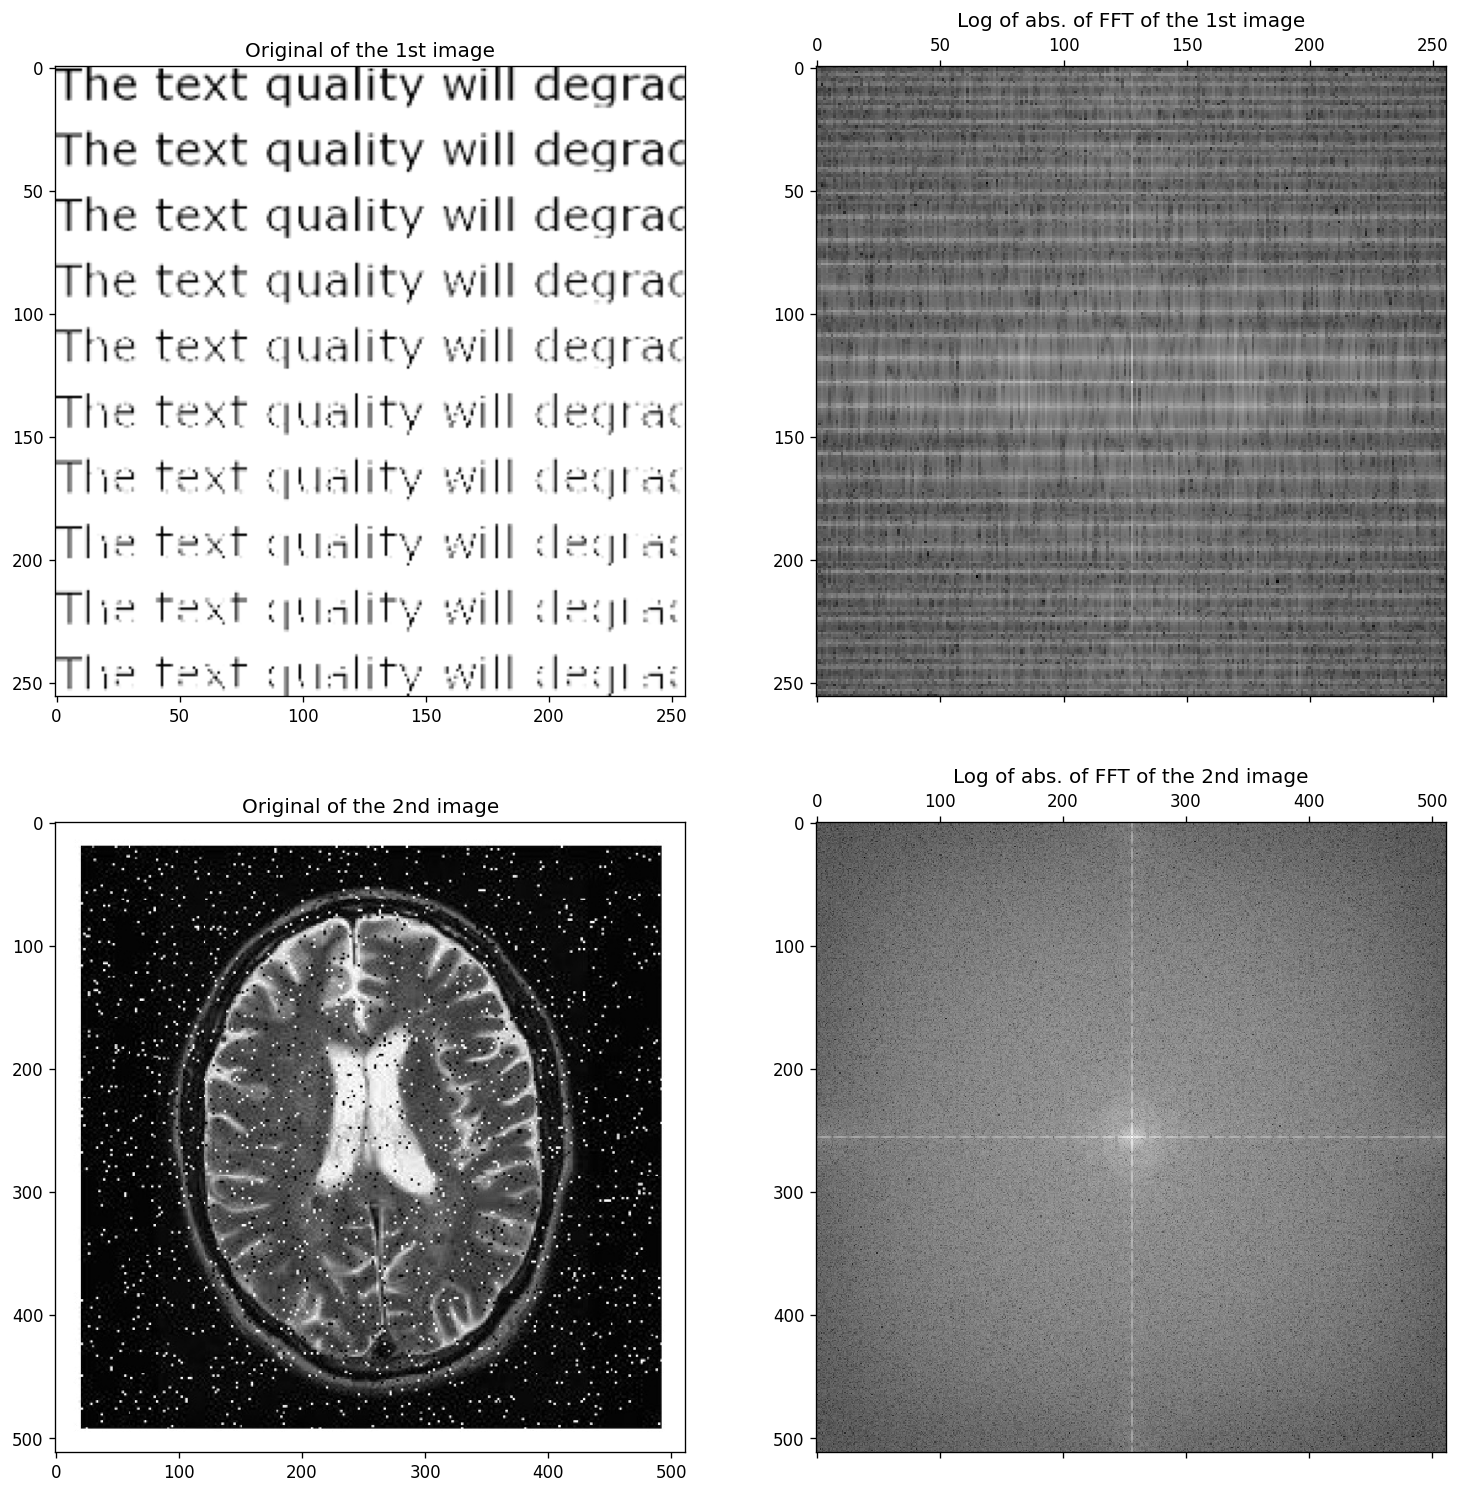

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].matshow(np_1_fft_logabs, cmap='gray')
axs[0, 1].set_title('Log of abs. of FFT of the 1st image')
axs[1, 0].imshow(np_2_sum, cmap='gray')
axs[1, 0].set_title('Original of the 2nd image')
axs[1, 1].matshow(np_2_fft_logabs, cmap='gray')
axs[1, 1].set_title('Log of abs. of FFT of the 2nd image')
plt.show()

Apply the ideal filter with various $D_0$ (which we define as a percentage of image's height).

In [13]:
np_1_id01 = apply_ideal_LP(np_1_fft, .1)
np_1_id05 = apply_ideal_LP(np_1_fft, .5)
np_1_id08 = apply_ideal_LP(np_1_fft, .8)

np_1_id01i = np.abs(get_ifft(np_1_id01))
np_1_id05i = np.abs(get_ifft(np_1_id05))
np_1_id08i = np.abs(get_ifft(np_1_id08))

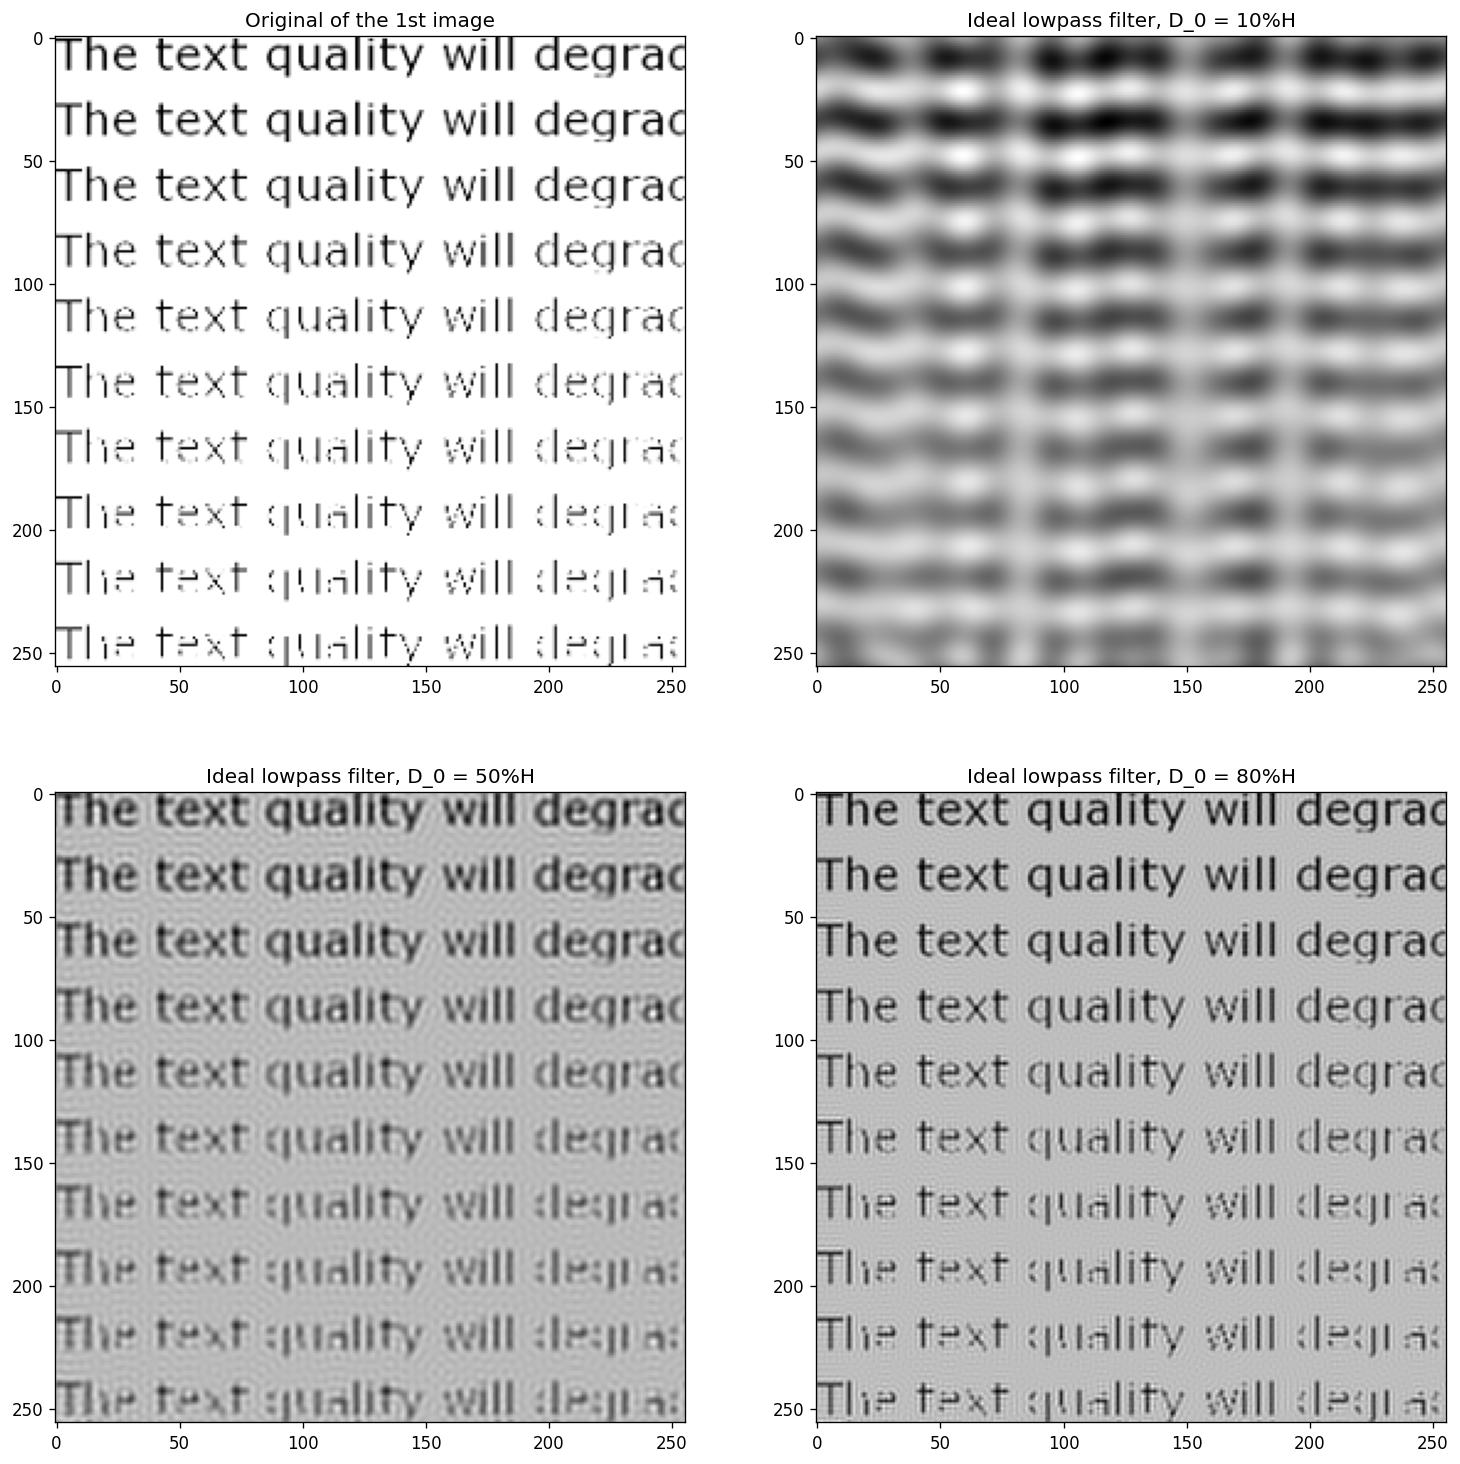

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].imshow(np_1_id01i, cmap='gray')
axs[0, 1].set_title('Ideal lowpass filter, D_0 = 10%H')
axs[1, 0].imshow(np_1_id05i, cmap='gray')
axs[1, 0].set_title('Ideal lowpass filter, D_0 = 50%H')
axs[1, 1].imshow(np_1_id08i, cmap='gray')
axs[1, 1].set_title('Ideal lowpass filter, D_0 = 80%H')
plt.show()

Результат при $D_0=10\%H$ практически совершенно бесполезен, если только задача сглаживания не состоит в устранении всех деталей изображения, за исключением пятен, представляющих большие объекты. Очень сильное размывание на этом изображении ясно указывает, что бόльшая часть информации о резких деталях на картинке содержится в 10 % энергии, отсеченной фильтром. По мере увеличения радиуса фильтра все меньшая и меньшая часть энергии подлежит отсечению, что выражается в уменьшении степени размывания. Отметим, что для изображений на $D_0=50\%H$ $D_0=80\%H$ характерен «звон», структура которого становится тоньше по мере уменьшения энергии, отсекаемой высокочастотной составляющей.

Можно отметить, что лучше всего текст читается на изображении с $D_0 \sim 50\%$ (например, 6 строка).

Применим фильтр Баттерворта, варьируя $D_0$ и значение порядка $n$.

In [15]:
## order 2

np_1_bw01_2 = apply_bw_LP(np_1_fft, .1, 2)
np_1_bw05_2 = apply_bw_LP(np_1_fft, .5, 2)
np_1_bw08_2 = apply_bw_LP(np_1_fft, .8, 2)

np_1_bw01i_2 = np.abs(get_ifft(np_1_bw01_2))
np_1_bw05i_2 = np.abs(get_ifft(np_1_bw05_2))
np_1_bw08i_2 = np.abs(get_ifft(np_1_bw08_2))

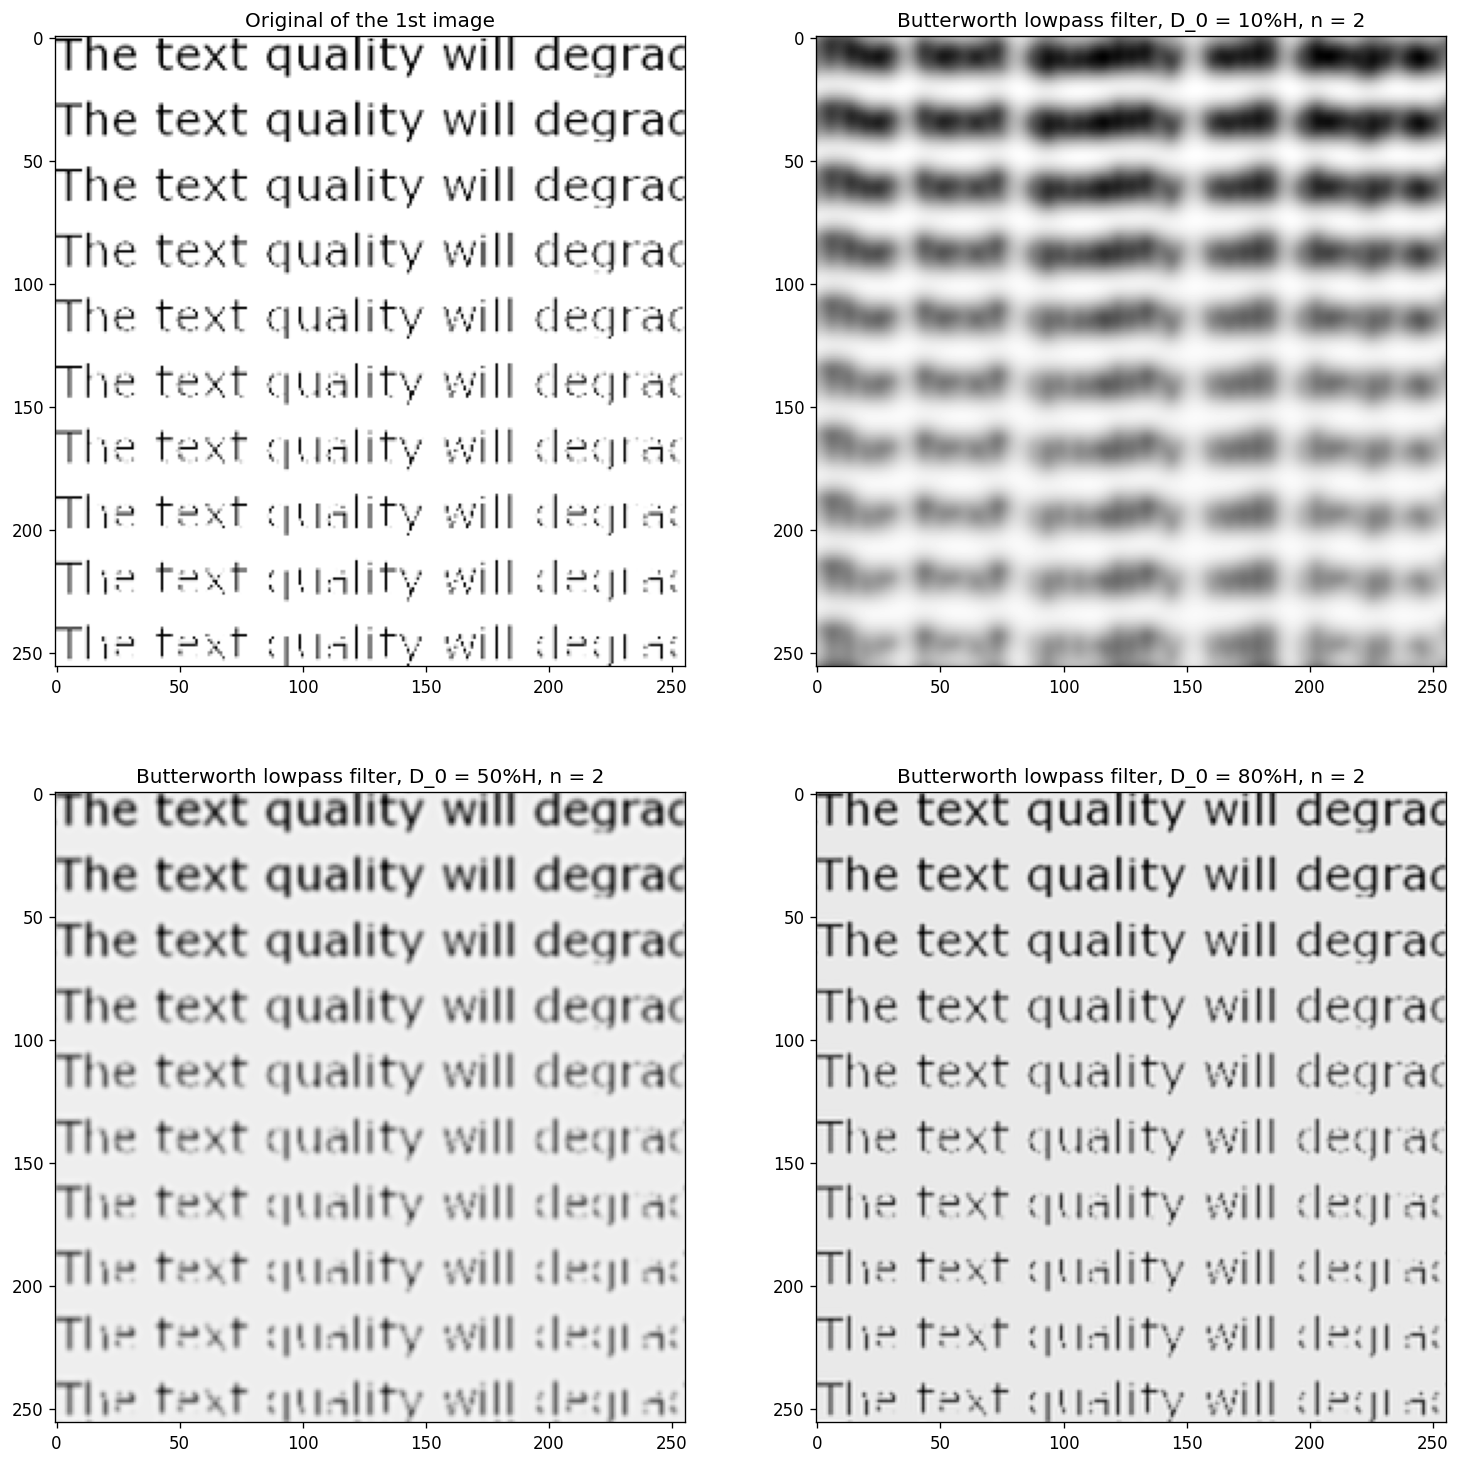

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].imshow(np_1_bw01i_2, cmap='gray')
axs[0, 1].set_title('Butterworth lowpass filter, D_0 = 10%H, n = 2')
axs[1, 0].imshow(np_1_bw05i_2, cmap='gray')
axs[1, 0].set_title('Butterworth lowpass filter, D_0 = 50%H, n = 2')
axs[1, 1].imshow(np_1_bw08i_2, cmap='gray')
axs[1, 1].set_title('Butterworth lowpass filter, D_0 = 80%H, n = 2')
plt.show()

In [17]:
## order 4

np_1_bw01_4 = apply_bw_LP(np_1_fft, .1, 4)
np_1_bw05_4 = apply_bw_LP(np_1_fft, .5, 4)
np_1_bw08_4 = apply_bw_LP(np_1_fft, .8, 4)

np_1_bw01i_4 = np.abs(get_ifft(np_1_bw01_4))
np_1_bw05i_4 = np.abs(get_ifft(np_1_bw05_4))
np_1_bw08i_4 = np.abs(get_ifft(np_1_bw08_4))

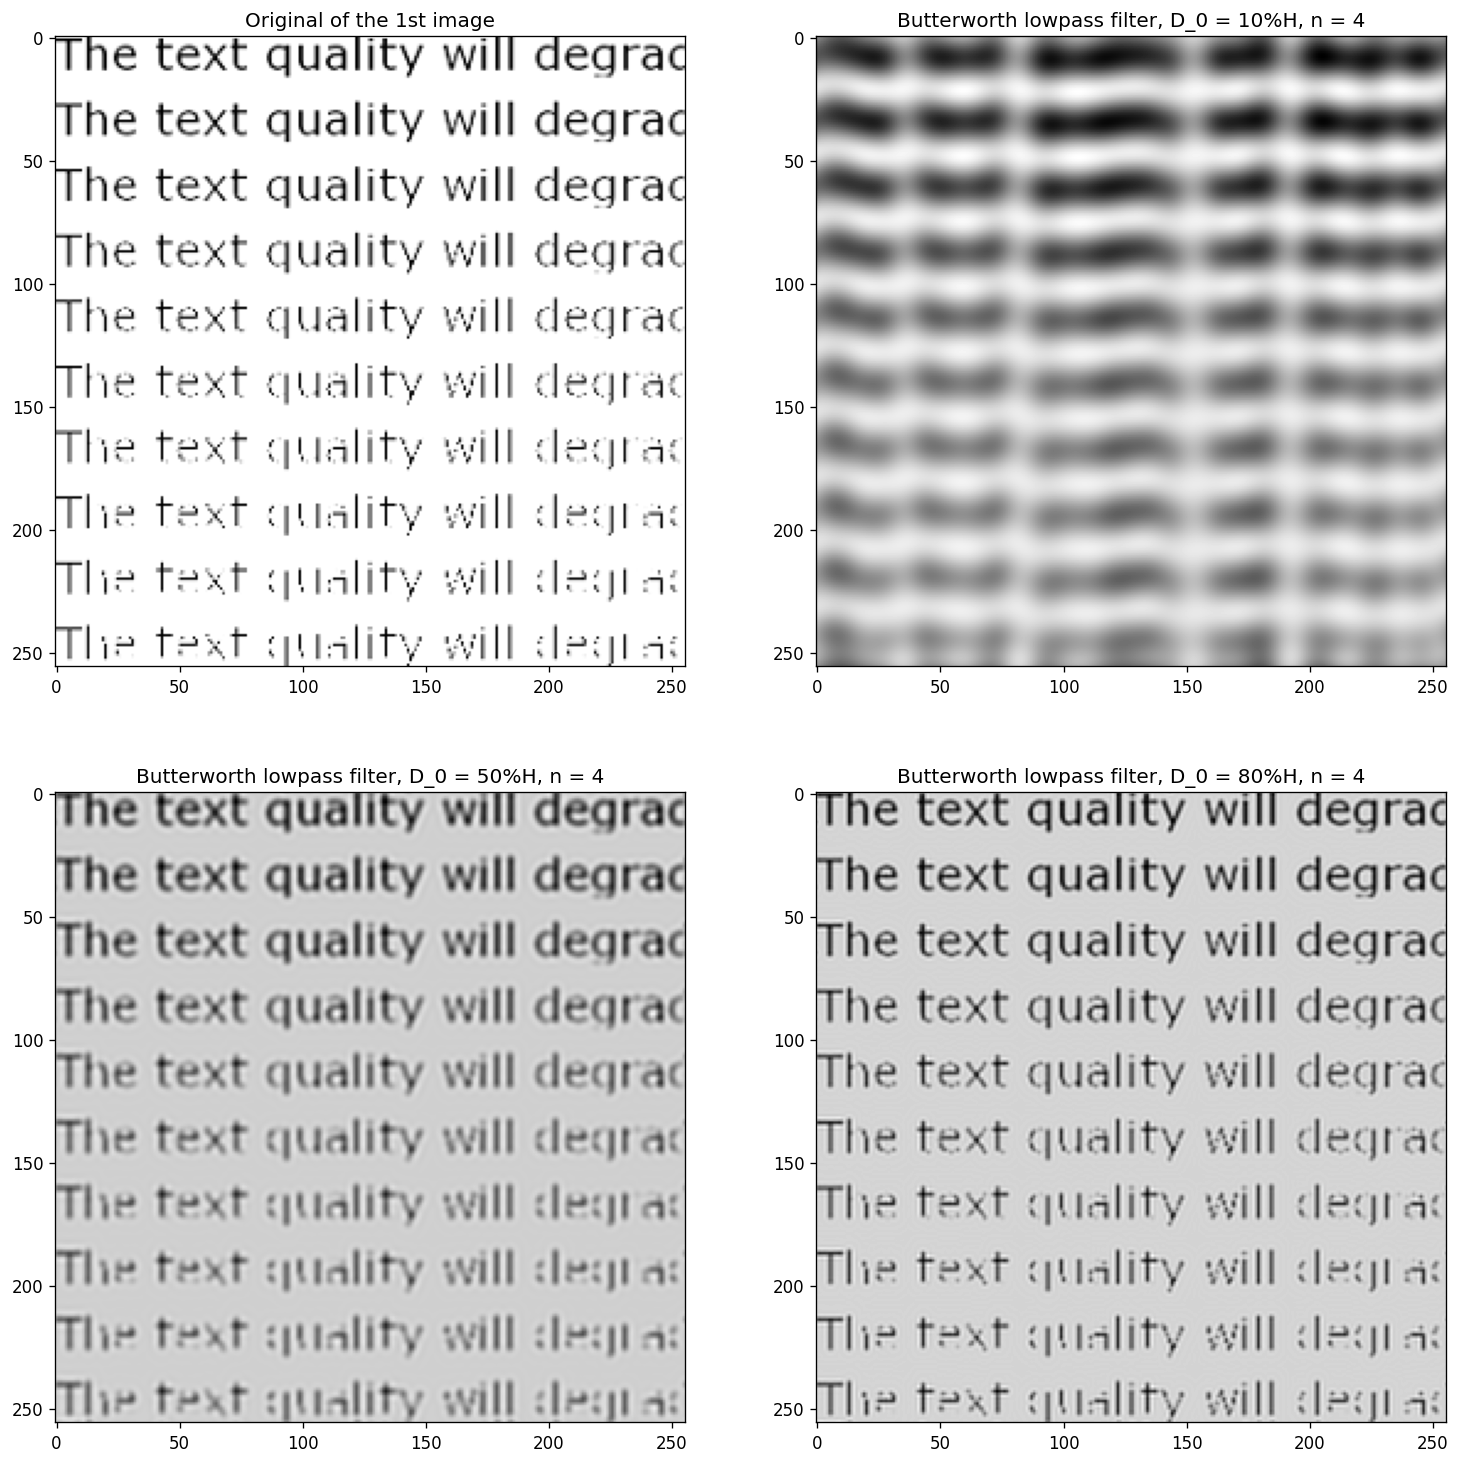

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].imshow(np_1_bw01i_4, cmap='gray')
axs[0, 1].set_title('Butterworth lowpass filter, D_0 = 10%H, n = 4')
axs[1, 0].imshow(np_1_bw05i_4, cmap='gray')
axs[1, 0].set_title('Butterworth lowpass filter, D_0 = 50%H, n = 4')
axs[1, 1].imshow(np_1_bw08i_4, cmap='gray')
axs[1, 1].set_title('Butterworth lowpass filter, D_0 = 80%H, n = 4')
plt.show()

Сравним результаты работы фильтра Баттерворта при $n=2$ и $n=4$.

В отличие от идеального ФНЧ, передаточная функция ФНЧ Баттерворта не имеет разрыва, который задает точную границу между пропускаемыми и обрезаемыми частотами. Поэтому в отличие от представленных ранее результатов, относящихся к случаю идеального ФНЧ, мы видим здесь плавное уменьшение степени размывания при увеличении частоты среза. Более того, ни на одном из обработанных изображений при помощи этого конкретного ФНЧ Баттерворта звон не заметен, что объясняется свойственным фильтру гладким переходом между низкими и высокими частотами, упомянутым ранее.


Рассмотрим результат применения фильтра Баттерворта при $n=2$ и $n=4$.

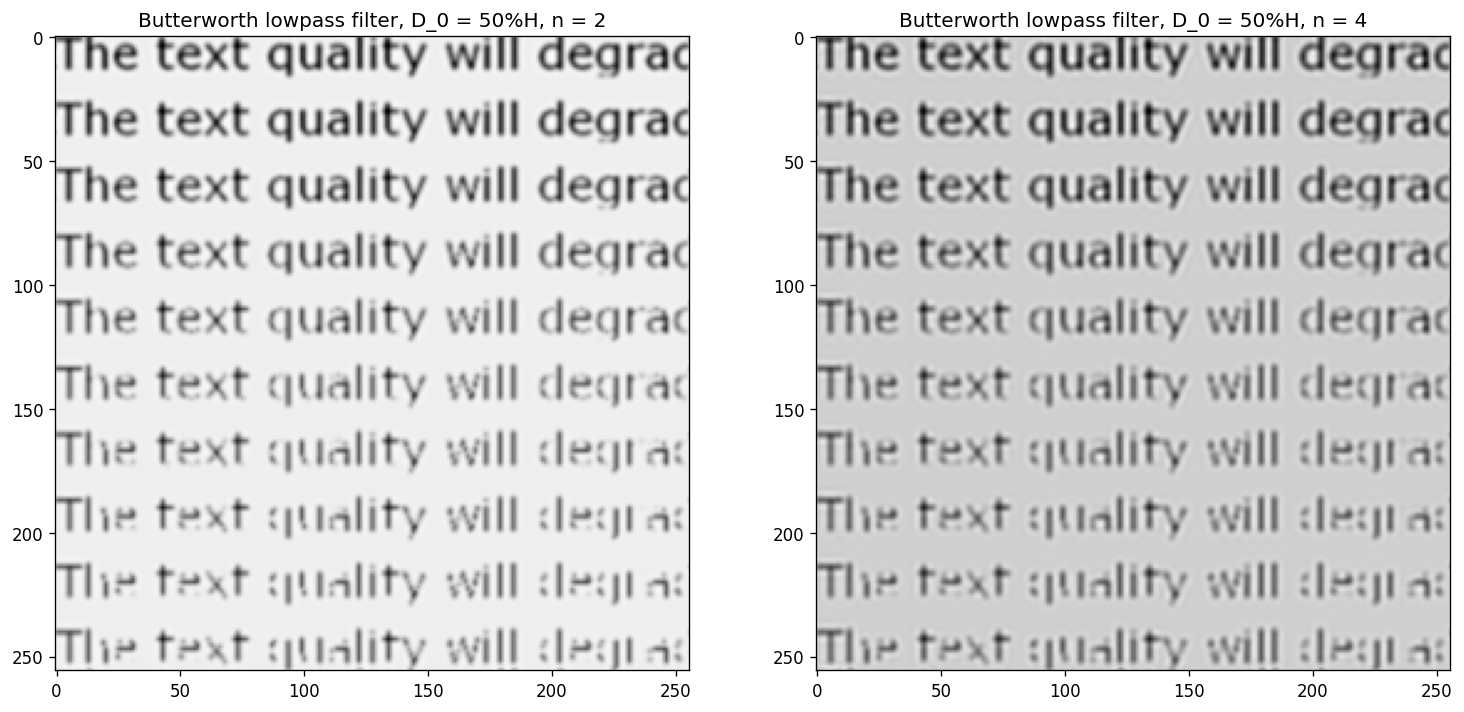

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15), dpi=120)
axs[0].imshow(np_1_bw05i_2, cmap='gray')
axs[0].set_title('Butterworth lowpass filter, D_0 = 50%H, n = 2')
axs[1].imshow(np_1_bw05i_4, cmap='gray')
axs[1].set_title('Butterworth lowpass filter, D_0 = 50%H, n = 4')
plt.show()

Результаты очень похожи, хотя текст читается лучше при $n = 4$. Стоит отметить, что увеличение порядка $n$ в фильтре Баттерворта приводит к появлению звона -- если при $n=4$ на данном изображении звон не очень заметен, то при увеличении $n$ результат действия фильтра становится идентичным с результатом действия идеального фильтра и приносит в изображение значительный звон.

Рассмотрим результаты применения фильтра Гаусса при различных значениях $D_0$.

In [20]:
np_1_gs01 = apply_gauss_LP(np_1_fft, .1)
np_1_gs05 = apply_gauss_LP(np_1_fft, .5)
np_1_gs08 = apply_gauss_LP(np_1_fft, .8)

np_1_gs01i = np.abs(get_ifft(np_1_gs01))
np_1_gs05i = np.abs(get_ifft(np_1_gs05))
np_1_gs08i = np.abs(get_ifft(np_1_gs08))

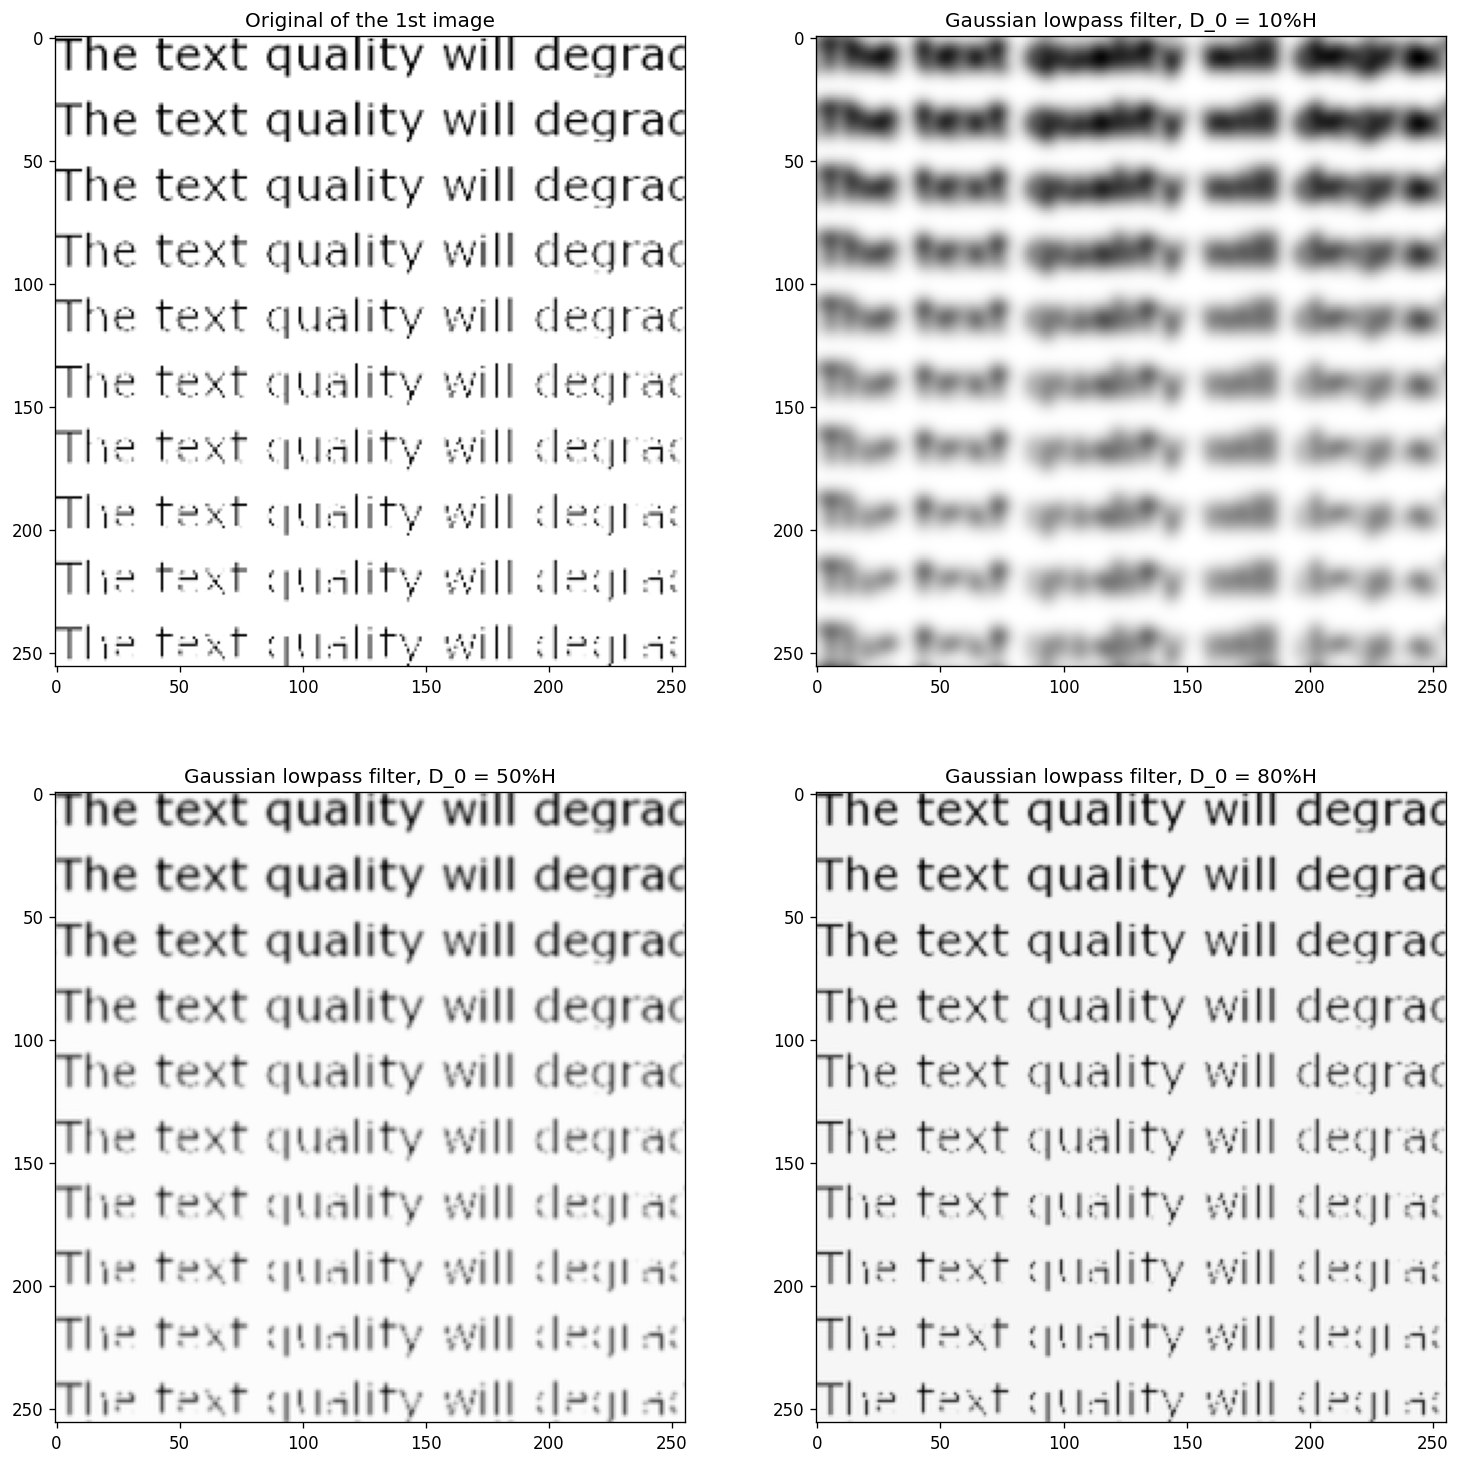

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].imshow(np_1_gs01i, cmap='gray')
axs[0, 1].set_title('Gaussian lowpass filter, D_0 = 10%H')
axs[1, 0].imshow(np_1_gs05i, cmap='gray')
axs[1, 0].set_title('Gaussian lowpass filter, D_0 = 50%H')
axs[1, 1].imshow(np_1_gs08i, cmap='gray')
axs[1, 1].set_title('Gaussian lowpass filter, D_0 = 80%H')
plt.show()

Так как обратное Фурье-преобразование от ФНЧ Гаусса есть гауссова функция, пространственный гауссов фильтр, полученный вычислением обратного ДПФ согласно выражениям, не будет создавать звона. Это утверждение подтверждается результатами применения фильтра к изображению. Применением фильтра Гаусса позволило сгладить изображение, не принося в него звон.
Как и в случае ФНЧ Баттерворта порядка 4, можно отметить плавное уменьшение степени размывания при увеличении частоты среза.

Наилучшее качество изображения достигнуто при  $D_0 \sim 50\%$.

Сравним лучшие результаты каждого из фильтров, примененных к исходному изображению с текстом: идеального фильтра, фильтра Баттерворта, фильтра Гаусса.

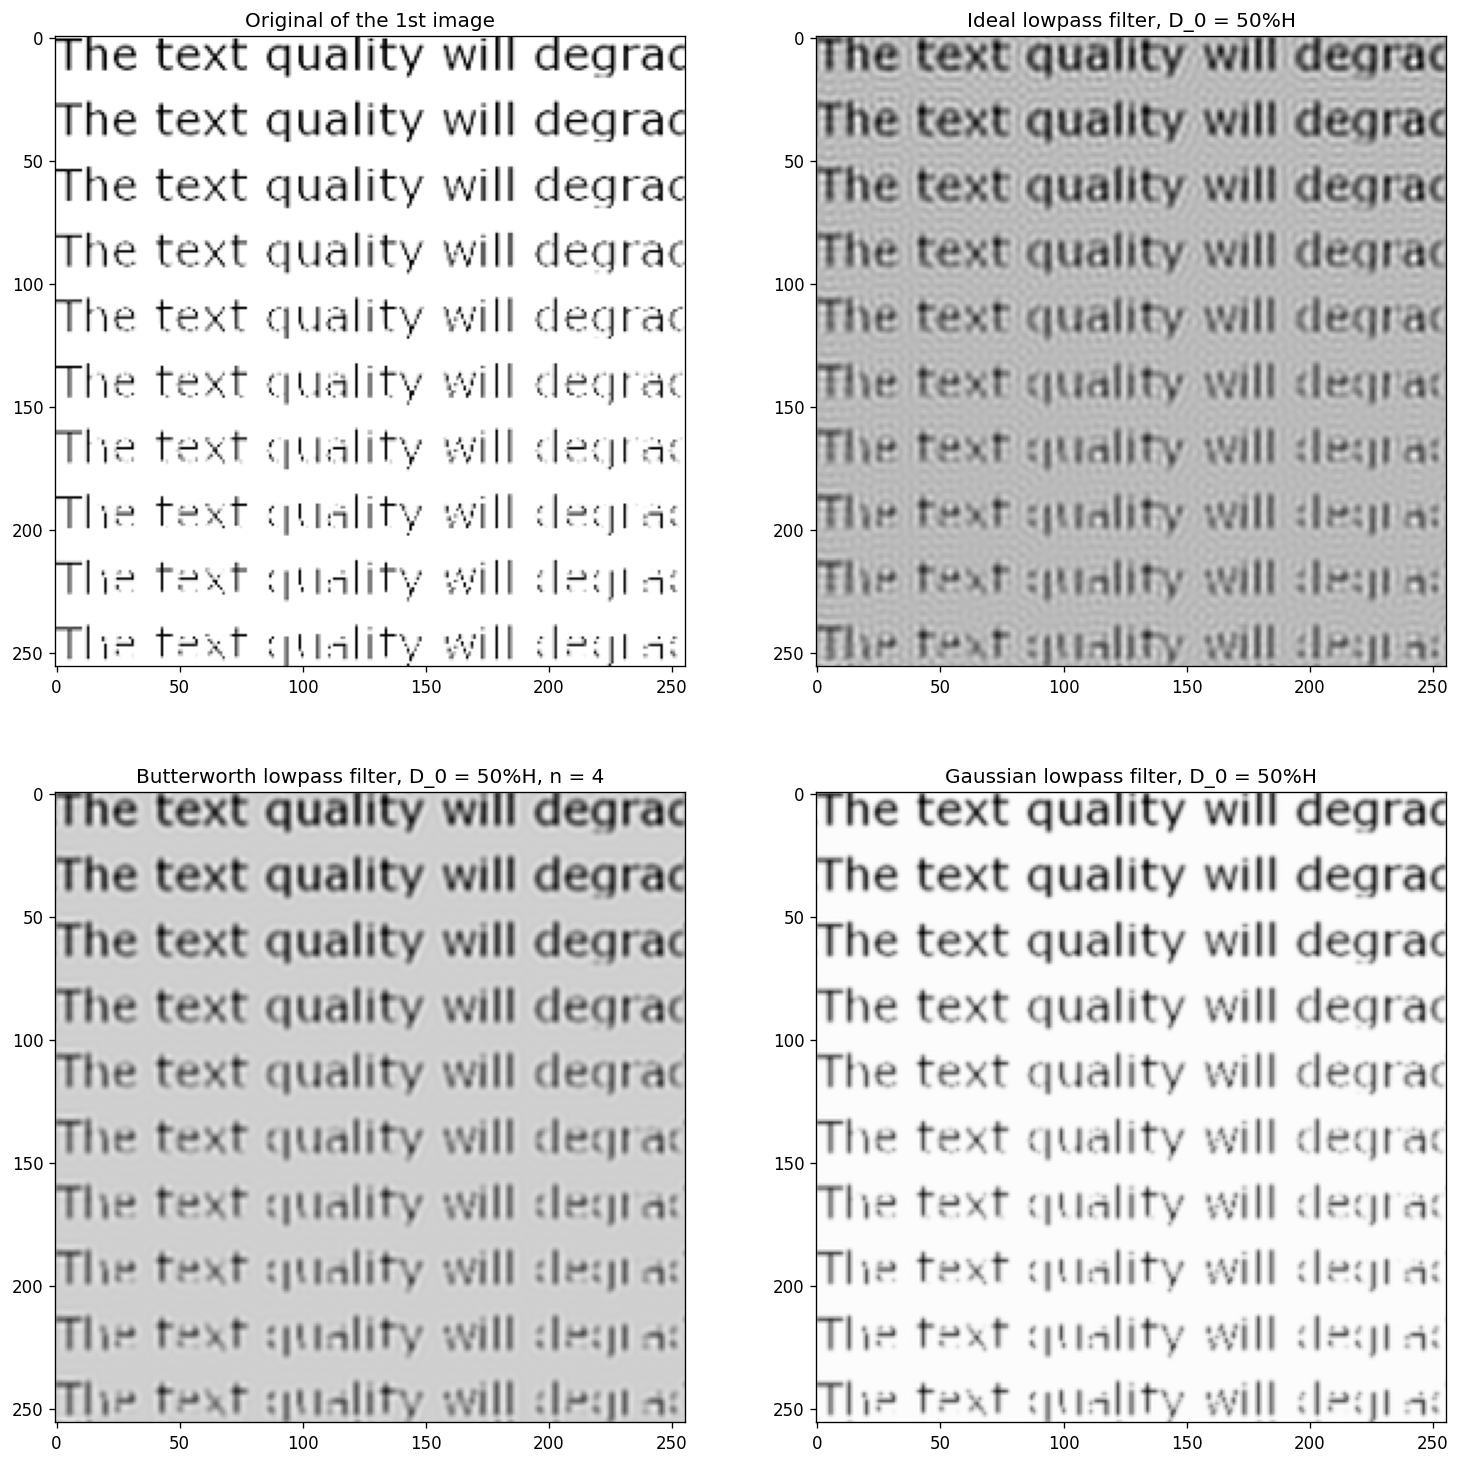

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].imshow(np_1_id05i, cmap='gray')
axs[0, 1].set_title('Ideal lowpass filter, D_0 = 50%H')
axs[1, 0].imshow(np_1_bw05i_4, cmap='gray')
axs[1, 0].set_title('Butterworth lowpass filter, D_0 = 50%H, n = 4')
axs[1, 1].imshow(np_1_gs05i, cmap='gray')
axs[1, 1].set_title('Gaussian lowpass filter, D_0 = 50%H')
plt.show()

Фильтр Баттерворта позволил избежать звона и сгладить изображение. Идеальный фильтр добавил к изображению большое количество звона и не слишком сгладил изображение. Фильтр Гаусса не добавил к изображению звон и сгладил изображение так же хорошо, как фильтр Баттерворта. Таким образом, применение фильтра Гаусса к изображению принесло лучшие результаты.

Таким образом, ФНЧ Гаусса удобно применять, когда на изображении недопустимы артефакты любого вида (например, при обработке медицинских изображений). В случаях, когда необходим жесткий контроль зоны перехода от низких к высоким частотам около частоты среза, ФНЧ Баттерворта предоставляет более подходящий выбор. Платой за этот дополнительный контроль над формой фильтра является необходимость считаться с возможностью появления звона.
 

Обработаем второе изображение.

In [23]:
np_2_id03 = apply_ideal_LP(np_2_fft, .3)
np_2_bw03 = apply_bw_LP(np_2_fft, .3, 4)
np_2_gs03 = apply_gauss_LP(np_2_fft, .3)

np_2_id03i = np.abs(get_ifft(np_2_id03))
np_2_bw03i = np.abs(get_ifft(np_2_bw03))
np_2_gs03i = np.abs(get_ifft(np_2_gs03))

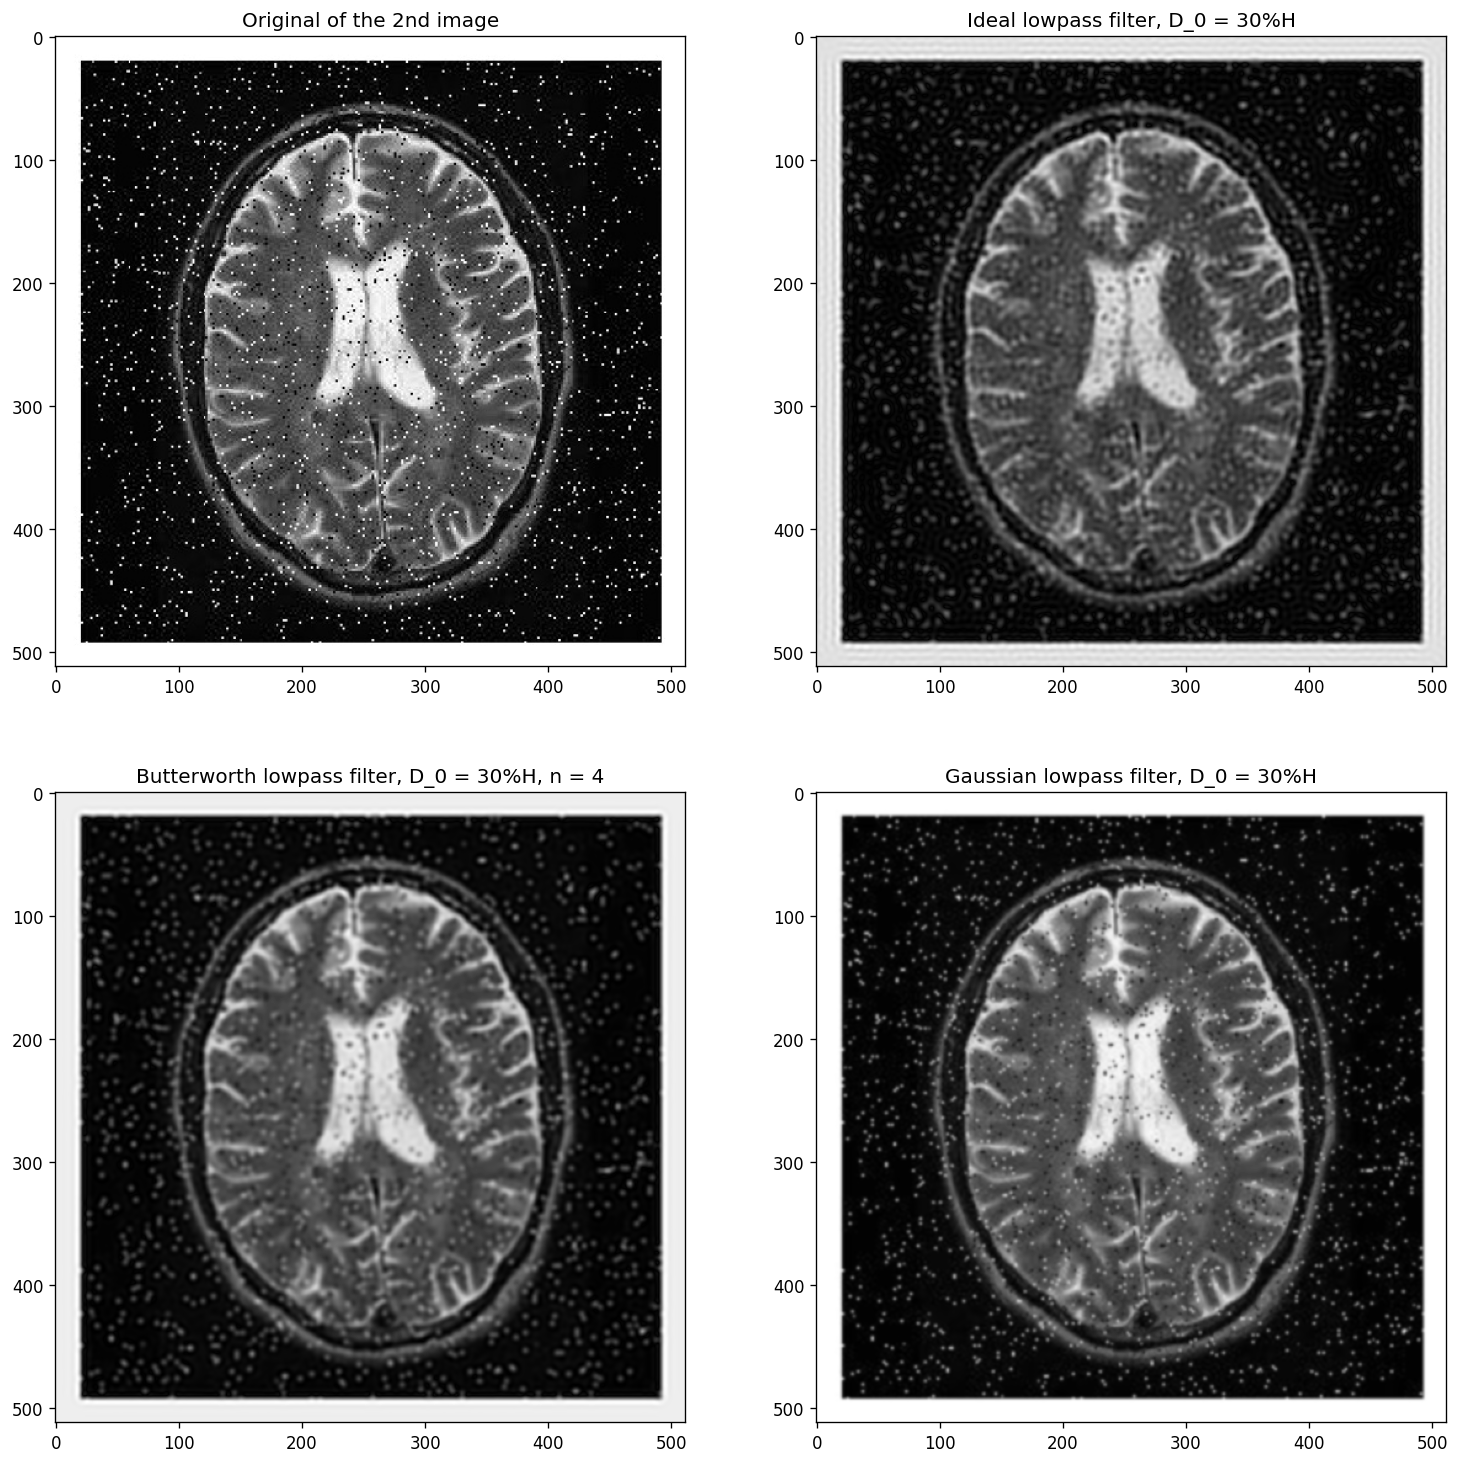

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_2_sum, cmap='gray')
axs[0, 0].set_title('Original of the 2nd image')
axs[0, 1].imshow(np_2_id03i, cmap='gray')
axs[0, 1].set_title('Ideal lowpass filter, D_0 = 30%H')
axs[1, 0].imshow(np_2_bw03i, cmap='gray')
axs[1, 0].set_title('Butterworth lowpass filter, D_0 = 30%H, n = 4')
axs[1, 1].imshow(np_2_gs03i, cmap='gray')
axs[1, 1].set_title('Gaussian lowpass filter, D_0 = 30%H')
plt.show()

Идеальный фильтр позволил лучше всех остальных фильтров избавиться от шума в виде белых точек ("соль"), но достаточно сильно размыло изображение и внесло звон. Применение фильтра Гаусса не добавило звон и позволило сохранить детали изображения, что для данного изображения более приоритетно. Фильтр Баттерворта представил результаты, схожие с идеальным фильтром, т.е., чрезмерно сгладил изображение, лишая его некоторых деталей (хотя и позволяя существенно убрать шум в виде белых точек).